In [6]:
import os
import obspy 
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from pandas import read_csv
from obspy.clients.fdsn import RoutingClient

In [7]:

def __showData(code, day, t1, t2):

    
    net, sta, loc, cha = code.split(".")
    
    tbeg = obspy.UTCDateTime(day) + t1*3600
    tend = obspy.UTCDateTime(day) + t2*3600

    inv = client.get_stations(network=net, station=sta, level='response')

    st = client.get_waveforms(network=net,
                              station=sta,
                              location=loc,
                              channel=cha,
                              starttime=tbeg,
                              endtime=tend
                             )

    st.remove_response(inventory=inv)

    
    st.detrend('simple')

    st.filter('bandpass', freqmin=0.001, freqmax=5., corners=4, zerophase=True)

    adata = abs(st[0].data)

    five_percent = np.int(np.ceil(len(adata)*0.95))

    adata_sort = np.sort(adata)

    ylimit = adata_sort[five_percent]

    fig, ax = plt.subplots(2,1, figsize=(15,5))

    ax[0].plot(st[0].data,'k')
    ax[1].plot(adata,'.', markersize=1)
    ax[1].plot([0,len(adata)],[ylimit,ylimit],'k--')

    plt.show();
    return fig


In [8]:

def __getQuality(code, day, tsteps, overlap, limit, output=None):

    if output:
        with open(opath+ofile, 'w') as out:
            out.write("timecode time[sec] 95%limit\n")
            
    net, sta, loc, cha = code.split(".")

    tdelta = overlap * tsteps

        
    ylimits  = np.zeros(int(1440/tdelta));
    timeline = np.zeros(int(1440/tdelta));
    
    for k in tqdm(range(0,int(1440/tdelta))):

        time = obspy.UTCDateTime(day) + k*tdelta*60
        tbeg = time - tdelta*60
        tend = time + tdelta*60 

        inv = client.get_stations(network=net, station=sta, level='response');

        st = client.get_waveforms(network=net,
                                  station=sta,
                                  location=loc,
                                  channel=cha,
                                  starttime=tbeg,
                                  endtime=tend
                                 );

        st.remove_response(inventory=inv);

        st.detrend('simple');

        st.filter('bandpass', freqmin=0.001, freqmax=5., corners=4, zerophase=True);

        adata = abs(st[0].data)

        five_percent = np.int(np.ceil(len(adata)*limit))

        adata_sort = np.sort(adata)

        ylimits[k] = adata_sort[five_percent];
        timeline[k] = k*tdelta*60;
    if output:
        with open(opath+ofile, 'a') as out:
            out.write(f"{time} {timeline[k]} {ylimits[k]}\n");
        
        out.close() 
    
    else: 
        return ylimits
    

In [9]:

opath = "/home/brotzer/Desktop/"
ofile = "test.txt"

code = "BW.ALFT..BHZ"

day = "2019-11-11"



client = RoutingClient('eida-routing')


tsteps = 20 # minutes
overlap = 0.5

limit = 0.95




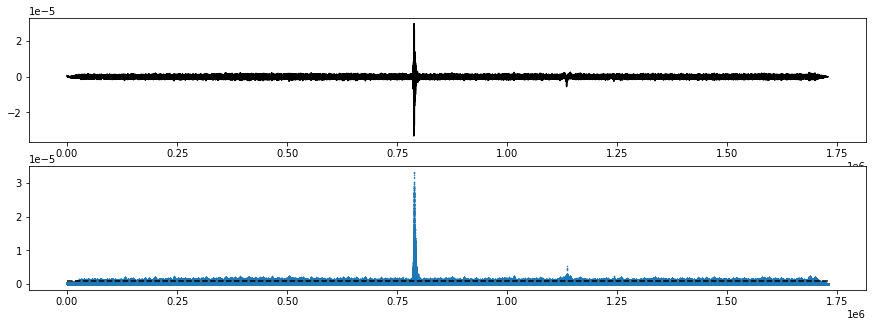

In [5]:

__showData(code, day, 0, 24);


In [6]:
   
__getQuality(code, day, tsteps, overlap, limit, output=True);


100%|██████████| 144/144 [01:05<00:00,  2.21it/s]


In [7]:

data = read_csv(opath+ofile, delimiter=" ")
div = int(3600/(data.iloc[1,1]-data.iloc[0,1]))

lnames = [int(t/3600) if i%div==0 else '' for i, t in enumerate(data.iloc[:,1])]


## _______________________________________________
##

fig , ax = plt.subplots(1,1, figsize=(14,4))

fs = 12

ax.plot(data.iloc[:,1],data.iloc[:,2], 'k--')
ax.plot(data.iloc[:,1],data.iloc[:,2], 'r.', markersize=10)

ax.set_xticks(data.iloc[:,1])
ax.set_xticklabels(lnames)

ax.axhline(np.median(data.iloc[:,2]), color="grey", zorder=0)

ax.set_xlabel("Time (hours)", fontsize=fs)
ax.set_ylabel("95%-Limit", fontsize=fs)

plt.show();

IndexError: single positional indexer is out-of-bounds

In [ ]:

__showData(code ,day, 3.5, 4.5);


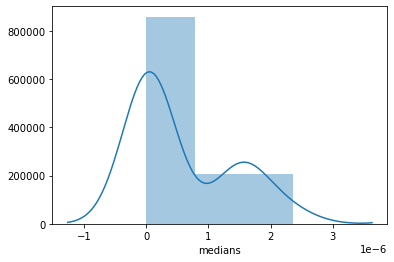

In [62]:
import seaborn as sns
sns.distplot(data.iloc[:,1])

In [87]:
%matplotlib auto

ipath = "/home/brotzer/Desktop/"

# ifile = "ALFT-BHZ-2020"
ifile = "ROMY-BJZ-2020"


#ncols=["date","medians","maximum", "minimum"]

data = read_csv(ipath+ifile, delimiter=" ", header=1)

data.tail()

days = [float(dat[8:10]) for i, dat in enumerate(data.datetime)]


## __________________________________________
##

fig, ax = plt.subplots(3,1, figsize=(15,6))

fs = 14

fig.subplots_adjust(hspace=0.4)

ax[0].plot(days, data.medians, 'k--')
ax[0].plot(days, data.medians, 'r.', markersize=10 , label="medians")

ax[0].axhline(5e-7, color="blue", linestyle="--")

ax[1].plot(days, data.maxima, color='grey', linestyle='--')
ax[1].plot(days, data.maxima,  'k.', label="maxima")

ax[2].plot(days, data.minima, color='grey', linestyle='--')
ax[2].plot(days, data.minima, 'k.', label="minima")

ax[0].legend(fontsize=fs)
ax[1].legend(fontsize=fs)
ax[2].legend(fontsize=fs)

ax[2].set_xlabel("days", fontsize=fs)

plt.show();

Using matplotlib backend: Qt5Agg


In [63]:
data.head()

,datetime,medians,maxima,minima
0,2020-10-01,3.017574e-08,6.966406e-07,8.768354e-09
1,2020-10-02,3.068553e-08,2.006836e-06,8.195134e-09
2,2020-10-03,2.495223e-08,2.091725e-06,7.946702e-09
3,2020-10-04,3.664149e-08,1.963044e-06,9.769174e-09
4,2020-10-05,4.319386e-08,2.242266e-06,9.745671e-09
